## **Homework 2**

### **Pandas**

In [3]:
# Импортируем необходимые для анализа библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import math
from keplergl import KeplerGl
import geopandas as gpd


In [4]:
# Прочитаем файл в переменную
file = r"c:\Users\admin\Desktop\kc_house_data.csv"
# присвоим его переменной "df". или любой другой понятной переменной  с помощью метода для чтения csv, 
df = pd.read_csv(file)

# Описание признаков датасета

| Переменная    | Описание                                                                                                                 |
| ------------- | ------------------------------------------------------------------------------------------------------------------------ |
| id            | Нотация для дома                                                                                                         |
| date          | дата когда было продано                                                                                                  |
| price         | Цена - это цель прогноза                                                                                                 |
| bedrooms      | Количество спален                                                                                                        |
| bathrooms     | Количество ванных комнат                                                                                                 |
| sqft_living   | Квадратные метры дома                                                                                                    |
| sqft_lot      | Квадратные метры общие                                                                                                   |
| floors        | Общие этажи (уровни) в доме                                                                                              |
| waterfront    | Дом, который имеет вид на набережную                                                                                     |
| view          | Вид из окна                                                                                                              |
| condition     | Насколько хорошим состояние в целом                                                                                      |
| grade         | Общая оценка, предоставленная Индекс от 1 до 13, где 1-3 - недостаточный уровень строительства и дизайна здания,         |
|               | 7 - средний уровень строительства и дизайна, а 11-13 - высококачественный уровень строительства и дизайна                |
| sqft_above    | Квадратные метры дома, кроме подвала                                                                                     |
| sqft_basement | Квадратные метры подвала                                                                                                 |
| yr_built      | Год постройки                                                                                                            |
| yr_renovated  | Год, когда дом был отремонтирован                                                                                        |
| zipcode       | Zip code                                                                                                                 |
| lat           | Широта координата                                                                                                        |
| long          | Координата долготы                                                                                                       |
| sqft_living15 | Кв. метры жилой площади у 15 соседей                                                                                                           |
| sqft_lot15    | Кв. метры общей площади у 15 соседей                                            |


Проверим, верно ли загрузился датасет

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Посмотрим типы данных, количество строк, столбцов, заполенны ли ячейки

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Пустых ячеек нет, большинство данных имеют цифровой тип и поддаются анализу, **однако, формат в некоторых столбцах не логичен**, так как не может быть полторы ванной комнаты, ну или полтора этажа (наверное)

## Изменим типы данных

In [7]:
# Заменим поплавок на инт (команда эс тайп не перезаписывает исходный столбец, поэтому нужно приравнивать к исходным данным)
df['bathrooms'] = df['bathrooms'].astype(int)


In [8]:
# Проверим результат
df['bathrooms'].dtypes, df['floors'].dtypes

(dtype('int32'), dtype('float64'))

Посмотрим статистическое описание датасета

In [9]:
# выводим статистические характеристики с фиксированной точностью
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,1.75,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.73,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.00,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.00,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.00,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [10]:
# еще раз ознакомимся с форматом данных в нашей таблице для их стандартизации, нормализации и тп
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639


Исправим формат даты

In [11]:
# положим в датафрейм столбца дата новый формат этой самой даты с помощью конвертации его в более понятный формат 
# с помощью to_datetame() столбец.
df['date'] = pd.to_datetime(df.date)
# print (df)
df[['date']].head()

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18


Обычно для визуализации таких данных использую барплоты, но выглядит сейчас это отвратительно, так как сильныйй раздрос цен между квартилями  и мин и макс

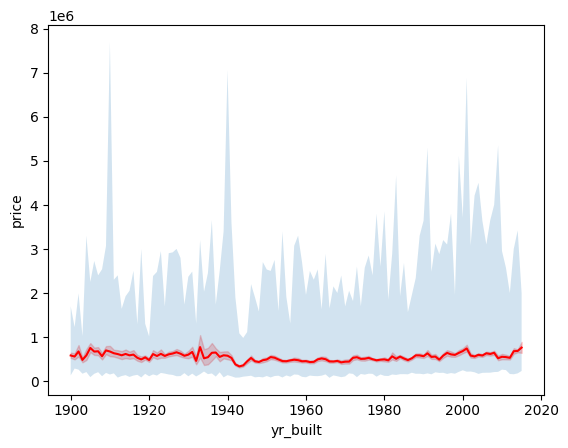

In [12]:
# Группировка данных по году постройки и вычисление минимального и максимального значения цены в каждой группе
price_range = df.groupby('yr_built')['price'].agg(['min', 'max'])

# Создание линейного графика
sns.lineplot(data=df, x="yr_built", y="price", color="r")

# Отображение диапазона на графике
plt.fill_between(price_range.index, price_range['min'], price_range['max'], alpha=0.2)

# Отображение графика
plt.show()

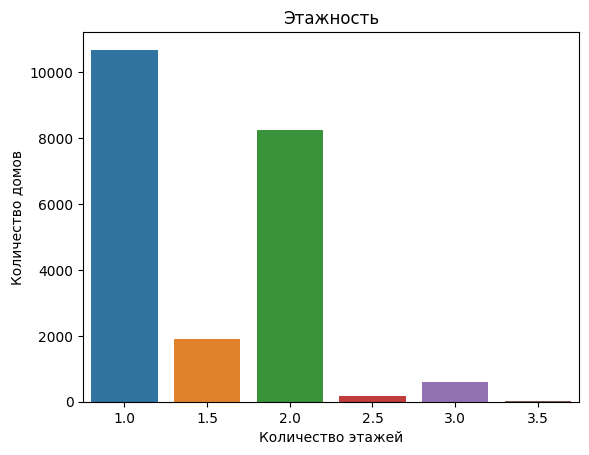

In [13]:
# Для решения этой задачи, нам необходимо группировать данные по этажам и посчитать сколько таких домов с помощью value count
count_floors = df['floors'].value_counts()
sns.barplot(x=count_floors.index, y=count_floors.values)
# добавляем подписи осей
plt.title("Этажность")
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

Как мы видим, в выборке в основном одноэтажные и двухэтажные дома

Насколько хорошие состояния у домов в данных?

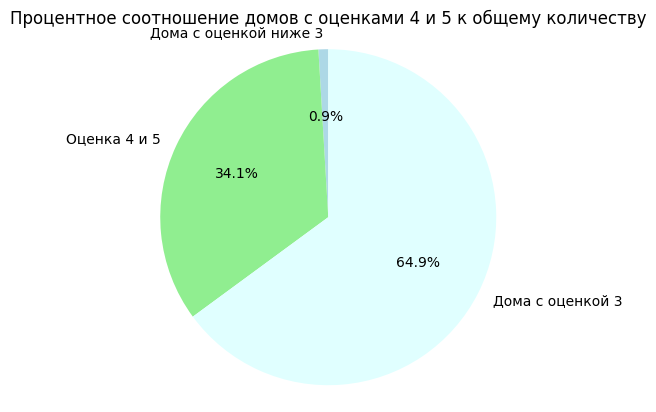

In [14]:
count_houses = len(df)
total_good_cond = sum(df['condition'].isin([4, 5]))
med_condition = sum(df['condition']== 3)
good_condition = total_good_cond/count_houses

# Строим круговую диаграмму
labels = ['Дома с оценкой ниже 3', 'Оценка 4 и 5','Дома с оценкой 3']
sizes = [count_houses - (total_good_cond + med_condition), total_good_cond, med_condition ]
colors = ['lightblue', 'lightgreen', 'lightcyan']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Процентное соотношение домов с оценками 4 и 5 к общему количеству')
plt.show()

В целом, состояние домов в среднем имеет оценку 3, хороших домов только треть

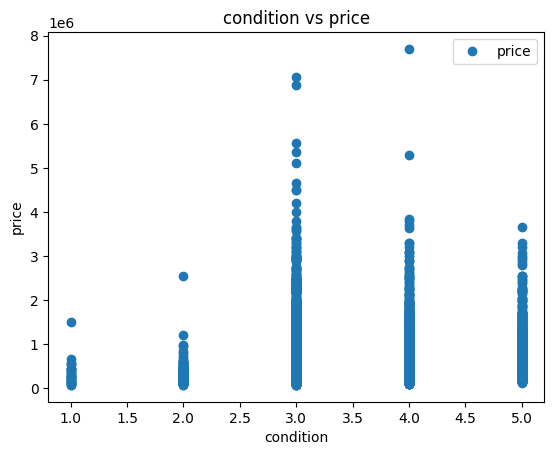

,condition,price
condition,1.00,0.04
price,0.04,1.00


In [15]:
df.plot(x='condition', y='price', style='o')
plt.title('condition vs price')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()
df[['condition','price']].corr()

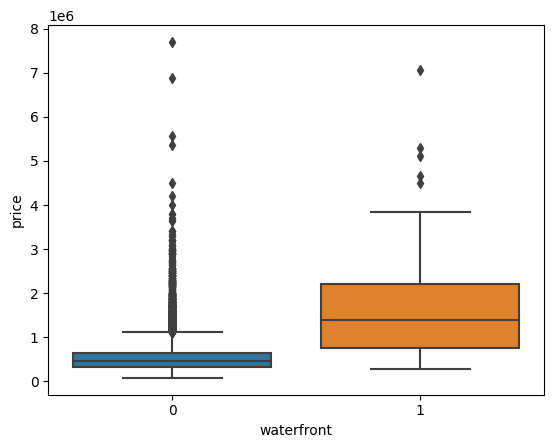

In [16]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.show()

In [17]:
# посмотрим от чего же в наибольшей степени зависит цена
corr_matrix = df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=False).head(6)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_7956/3715882859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price           1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.51
Name: price, dtype: float64

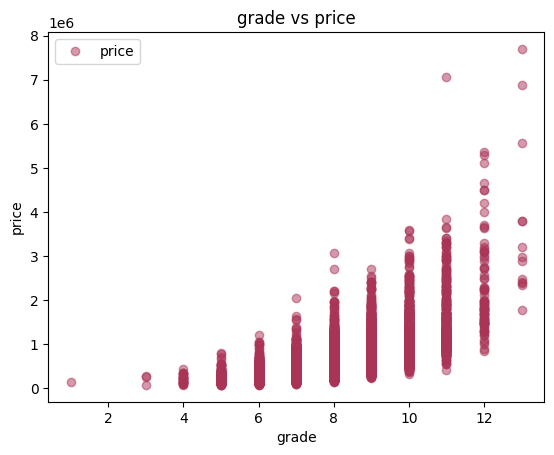

,grade,price
grade,1.00,0.67
price,0.67,1.00


In [18]:
df.plot(x='grade', y='price', style='o', alpha=0.5, color='#AA3456')
plt.title('grade vs price')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
df[['grade','price']].corr()

минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома

In [19]:
grouped_prices = df.groupby('condition')['price'].agg(['min', 'mean', 'max'])
grouped_prices

,min,mean,max
condition,,,
1,78000.00,334431.67,1500000.00
2,80000.00,327287.15,2555000.00
3,75000.00,542012.58,7062500.00
4,89000.00,521200.39,7700000.00
5,110000.00,612418.09,3650000.00


In [20]:
# группируем данные по виду на набережную и оценке вида и находим количество строк в каждой группе
grouped_data_waterfront = df.groupby(['waterfront', 'view']).size().reset_index(name='количество')
grouped_data_waterfront


,waterfront,view,количество
0,0,0,19489
1,0,1,331
2,0,2,955
3,0,3,491
4,0,4,184
5,1,1,1
6,1,2,8
7,1,3,19
8,1,4,135


## Условие 1: Задача 1

1.1. Скачать следующие данные: kc-house-data (Done)


1.2. Изучите стоимости недвижимости

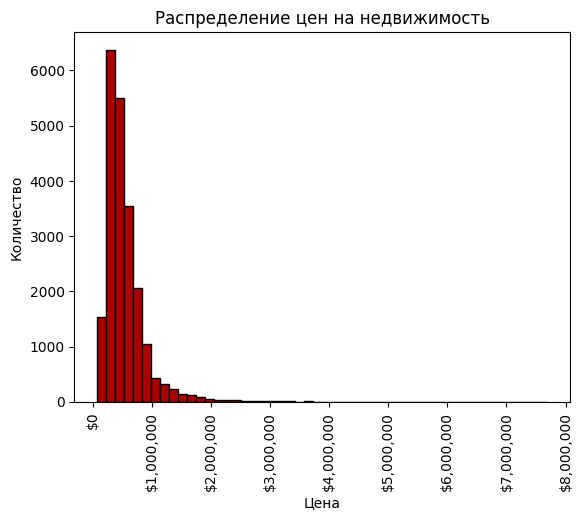

In [21]:
import matplotlib.ticker as mtick

# создание гистограммы распределения цен
fig, ax = plt.subplots()
ax.hist(df['price'], bins=50,color='#AA0000', edgecolor='black')
ax.set_xlabel('Цена')
ax.set_ylabel('Количество')
ax.set_title('Распределение цен на недвижимость')

# форматирование оси y в долларах
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.xticks(rotation=90)
plt.show()

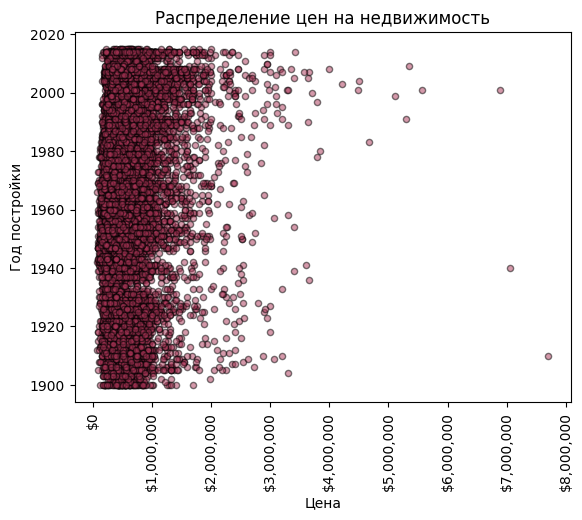

In [22]:
# В целом, не важно какой столбец сейчас соотн6осить к цене, я хотела увидеть точечный график, где видно, что несколько домов сильно выбиваются 
# из среднестатистических цен и вообьще дома более 4 млн - это большая редкость. в основном это цены до 1.5 млн
fig, ax = plt.subplots()
ax.scatter(df['price'], df['yr_built'], s=20, alpha=0.5, color='#AA3456', edgecolor='black')
ax.set_xlabel('Цена')
ax.set_ylabel('Год постройки')
ax.set_title('Распределение цен на недвижимость')

# форматирование оси x в долларах
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.xticks(rotation=90)

plt.show()

In [23]:
df['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64


Значение std говорит о том, что цены на недвижимость в датасете имеют большой разброс. Стандартное отклонение показывает, насколько разбросаны цены относительно средней цены. В данном случае, стандартное отклонение равно 367127.20, что говорит о том, что цены на недвижимость в датасете могут значительно отличаться от средней цены. 

## Проведем анализ на выбросы:

При наличии выбросов в наборе данных могут использоваться различные методы анализа для получения более полной информации о распределении данных. Используем некоторые из них:

In [24]:
# Z-SCORE ANALYSIS - ЭТО СТАТИСТИЧЕСКИЙ МЕТОД, КОТОРЫЙ ПОЗВОЛЯЕТ ОЦЕНИТЬ НАСКОЛЬКО ДАЛЕКО ВЫБРОСЫ НАХОДЯТСЯ ОТ СРЕДНЕГО ЗНАЧЕНИЯ НАБОРА ДАННЫХ В СТАНДАРТНЫХ ОТКЛОНЕНИЯХ.
# Вычисляем среднее значение и стандартное отклонение
mean = df['price'].mean()
std_dev = df['price'].std()

# Вычисляем z-оценки для каждого значения в датафрейме
df['z_score'] = (df['price'] - mean) / std_dev

# Выводим значения z-оценок для выбросов
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
outliers


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score
21,2524049179,2014-08-26,2000000.00,3,2,3050,44867,1.00,0,4,...,2330,720,1968,0,98040,47.53,-122.23,4110,20336,3.98
153,7855801670,2015-04-01,2250000.00,4,3,5180,19850,2.00,0,3,...,3540,1640,2006,0,98006,47.56,-122.16,3160,9750,4.66
246,2025069065,2014-09-29,2400000.00,4,2,3650,8354,1.00,1,4,...,1830,1820,2000,0,98074,47.63,-122.07,3120,18841,5.07
269,7960900060,2015-05-04,2900000.00,4,3,5050,20100,1.50,0,2,...,4750,300,1982,2008,98004,47.63,-122.22,3890,20060,6.43
282,7424700045,2015-05-13,2050000.00,5,3,3830,8480,2.00,0,1,...,2630,1200,1905,1994,98122,47.62,-122.29,3050,7556,4.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,3262300818,2015-02-27,1865000.00,4,3,3790,8797,2.00,0,0,...,3290,500,2006,0,98039,47.64,-122.24,2660,12150,3.61
21530,8964800330,2015-04-07,3000000.00,4,3,5090,14823,1.00,0,0,...,4180,910,2013,0,98004,47.62,-122.21,3030,12752,6.70
21540,715010530,2015-01-13,1881580.00,5,3,4410,13000,2.00,0,3,...,2920,1490,2014,0,98006,47.54,-122.11,5790,12969,3.65
21568,524059330,2015-01-30,1700000.00,4,3,3830,8963,2.00,0,0,...,3120,710,2014,0,98004,47.60,-122.20,2190,10777,3.16


Согласно этому виду анализа, 406 строк являются потенциальными выбросами, так как находятся за пределами допустимых z-score и могут исказить наши данные. 

# Попробуем убрать выбросы, определив их с помощью интерквартильного размаха и снова проведем тест z_score

1. q1 = df['price'].quantile(0.25) - здесь мы вычисляем первый квартиль (25-й процентиль) для столбца 'price' в нашем DataFrame df.

2. q3 = df['price'].quantile(0.75) - здесь мы вычисляем третий квартиль (75-й процентиль) для столбца 'price' в нашем DataFrame df.

3. iqr = q3 - q1 - здесь мы вычисляем межквартильный размах (IQR) для столбца 'price' в нашем DataFrame df.

4. lower_bound = q1 - 1.5 * iqr - здесь мы вычисляем нижнюю границу интервала без выбросов, используя первый квартиль, межквартильный размах и коэффициент 1.5.

5. upper_bound = q3 + 1.5 * iqr - здесь мы вычисляем верхнюю границу интервала без выбросов, используя третий квартиль, межквартильный размах и коэффициент 1.5.

6. filtered_data = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)] - здесь мы фильтруем данные в DataFrame df, оставляя только те строки, где значения столбца 'price' находятся в интервале без выбросов, который мы определили на предыдущих шагах.

7. stats = filtered_data['price'].describe() - здесь мы вычисляем описательную статистику для столбца 'price' в DataFrame filtered_data, который содержит только данные без выбросов.




In [25]:
# определение границ интервала без выбросов
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# фильтрация данных без выбросов
filtered_data = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# подсчет описательной статистики без выбросов
stats = filtered_data['price'].describe()

print(stats)

count     20467.00
mean     476984.56
std      208371.26
min       75000.00
25%      315000.00
50%      437500.00
75%      600000.00
max     1127500.00
Name: price, dtype: float64


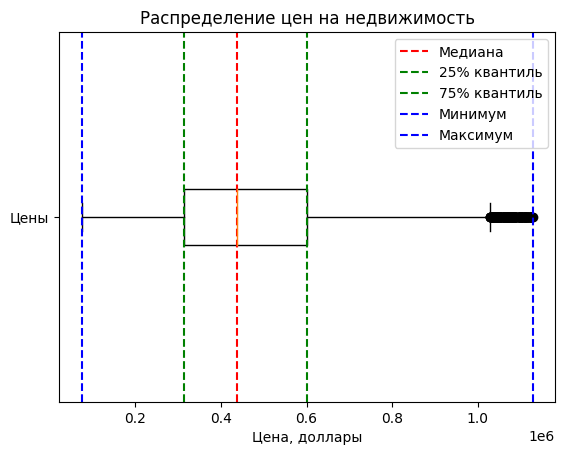

In [26]:
# создание boxplot
fig, ax = plt.subplots()
ax.boxplot(filtered_data['price'], vert=False)

# добавление подписей
ax.set_title('Распределение цен на недвижимость')
ax.set_xlabel('Цена, доллары')
ax.set_yticklabels(['Цены'])

# добавление медианы, квантилей, минимума и максимума
median = filtered_data['price'].median()
Q1 = filtered_data['price'].quantile(0.25)
Q3 = filtered_data['price'].quantile(0.75)
minimum = filtered_data['price'].min()
maximum = filtered_data['price'].max()

ax.axvline(median, color='r', linestyle='--', label='Медиана')
ax.axvline(Q1, color='g', linestyle='--', label='25% квантиль')
ax.axvline(Q3, color='g', linestyle='--', label='75% квантиль')
ax.axvline(minimum, color='b', linestyle='--', label='Минимум')
ax.axvline(maximum, color='b', linestyle='--', label='Максимум')

# добавление легенды
ax.legend()

plt.show()

In [27]:
# Z-SCORE ANALYSIS - 
# Вычисляем среднее значение и стандартное отклонение
mean_filtred = filtered_data['price'].mean()
std_dev = filtered_data['price'].std()

# Вычисляем z-оценки для каждого значения в датафрейме
filtered_data['z_score'] = (filtered_data['price'] - mean) / std_dev

# Выводим значения z-оценок для выбросов
outliers_filtred_data = filtered_data[(df['z_score'] > 3) | (filtered_data['z_score'] < -3)]
outliers_filtred_data

C:\Users\admin\AppData\Local\Temp/ipykernel_7956/325902462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['z_score'] = (filtered_data['price'] - mean) / std_dev
C:\Users\admin\AppData\Local\Temp/ipykernel_7956/325902462.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_filtred_data = filtered_data[(df['z_score'] > 3) | (filtered_data['z_score'] < -3)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score


In [28]:
filtered_data['z_score'].describe()

count   20467.00
mean       -0.30
std         1.00
min        -2.23
25%        -1.08
50%        -0.49
75%         0.29
max         2.82
Name: z_score, dtype: float64

Как мы видим, это решило проблему выбросов, дф очищен от выбросов и строк превышающих значение -3 и 3 нету.
Посмотрим на график визуально

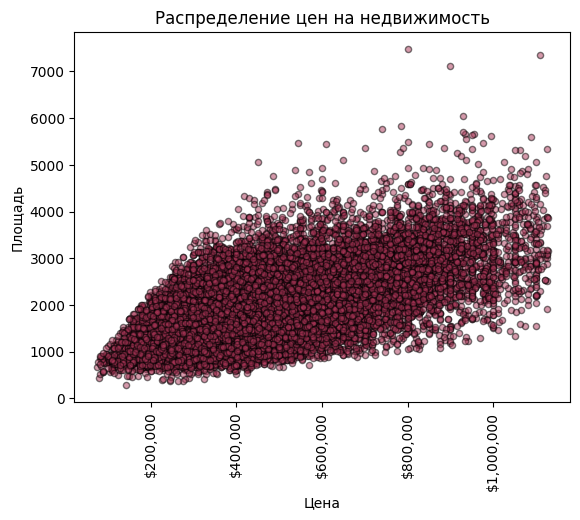

In [29]:
# В целом, не важно какой столбец сейчас соотн6осить к цене, я хотела увидеть точечный график, где видно, что несколько домов сильно выбиваются 
# из среднестатистических цен и вообьще дома более 4 млн - это большая редкость. в основном это цены до 1.5 млн
fig, ax = plt.subplots()
ax.scatter(filtered_data['price'], filtered_data['sqft_living'], s=20, alpha=0.5, color='#AA3456', edgecolor='black')
ax.set_xlabel('Цена')
ax.set_ylabel('Площадь')
ax.set_title('Распределение цен на недвижимость')

# форматирование оси x в долларах
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.xticks(rotation=90)

plt.show()

1.3. Изучите распределение квадратуры жилой


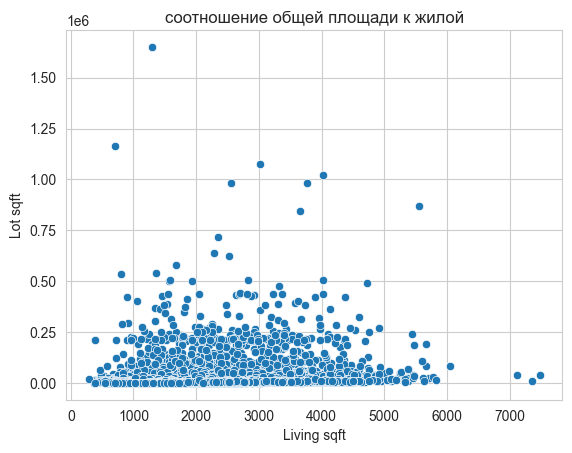

In [30]:
sns.set_style("whitegrid")

sns.scatterplot(x='sqft_living', y='sqft_lot', data=filtered_data)

plt.title('соотношение общей площади к жилой')
plt.xlabel('Living sqft')
plt.ylabel('Lot sqft')


plt.show()

Средняя доля жилой площади от общей площади по всем домам: 32.37%


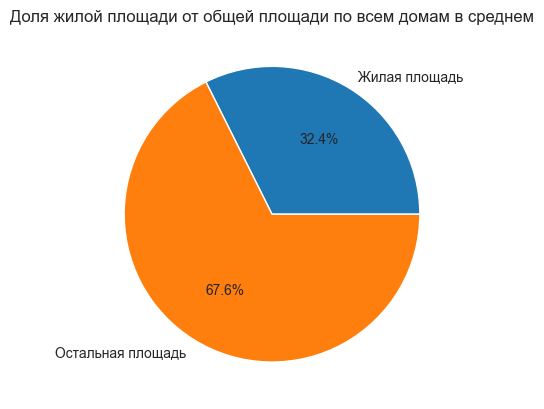

In [31]:

living_area_ratio = (df['sqft_living'] / df['sqft_lot']).mean()

# Вывод результата
print("Средняя доля жилой площади от общей площади по всем домам: {:.2%}".format(living_area_ratio))
#  Вычисление доли оставшейся площади
other_area_ratio = 1 - living_area_ratio

# Создание списка долей для круговой диаграммы
ratios = [living_area_ratio, other_area_ratio]

# Создание списка меток для круговой диаграммы
labels = ['Жилая площадь', 'Остальная площадь']

# Создание круговой диаграммы
plt.pie(ratios, labels=labels, autopct='%1.1f%%')

# Добавление заголовка
plt.title('Доля жилой площади от общей площади по всем домам в среднем')

# Отображение диаграммы
plt.show()
#

In [32]:
corr_matrix = filtered_data[['sqft_living', 'sqft_lot']].corr()
corr_matrix

,sqft_living,sqft_lot
sqft_living,1.00,0.16
sqft_lot,0.16,1.00


Мы видим, что зависимость очень слаба и на графике и в корреляции, поэтому сильно анализировать это не стоит

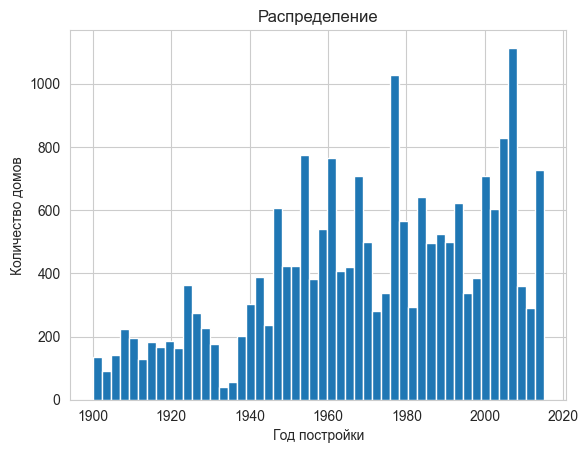

In [33]:
plt.hist(filtered_data['yr_built'], bins=50)

plt.title('Распределение')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')


plt.show()

Распределение на графике сложно назвать нормальным и сложно сказать в какие интервалы домов строилось больше суммарно, можно провести разделение на периоды

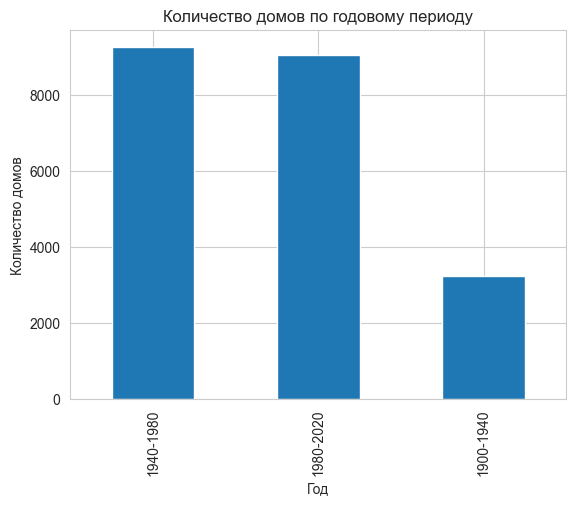

In [34]:
boundaries = [1900, 1940, 1980, 2020]
df['year_period'] = pd.cut(df['yr_built'], boundaries, labels=['1900-1940', '1940-1980', '1980-2020'])


df['year_period'].value_counts().plot(kind='bar')


plt.title('Количество домов по годовому периоду')
plt.xlabel('Год')
plt.ylabel('Количество домов')


plt.show()

теперь видно, что практически все дома были простроены начиная с 1940 года. суммарно 2 периода практически равны

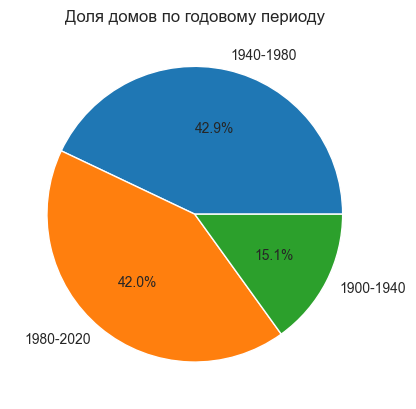

In [35]:
# создание круговой диаграммы
plt.pie(df['year_period'].value_counts(), labels=df['year_period'].value_counts().index, autopct='%1.1f%%')

# добавление заголовка
plt.title('Доля домов по годовому периоду')

# отображение круговой диаграммы
plt.show()



 Изучим распределение домов от наличия вида на набережную


In [36]:
bins = np.linspace(min(df["waterfront"]), max(df["waterfront"]), 3)
df["waterfront-binned"] = pd.cut(df["waterfront"], bins, labels=["No","Yes"], include_lowest=True)
df["waterfront-binned"].value_counts()

No     21450
Yes      163
Name: waterfront-binned, dtype: int64

In [37]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

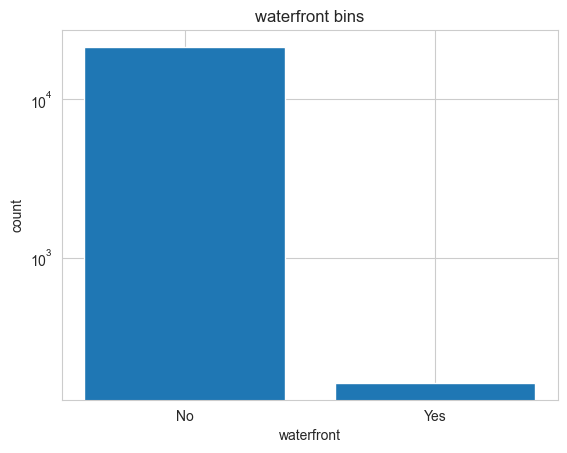

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
group_names = ['No', 'Yes']
counts = df["waterfront-binned"].value_counts()

plt.bar(group_names, counts)
plt.yscale('log')
plt.xlabel("waterfront")
plt.ylabel("count")
plt.title("waterfront bins")
plt.show()

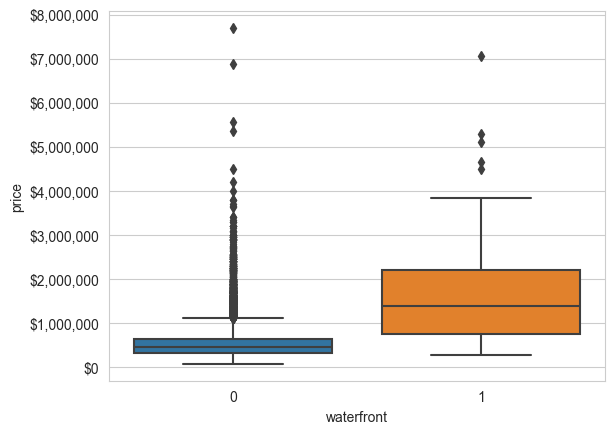

In [39]:
# выбросы сильно искажают данные, но мы видим, что дома, находящиеся около водоемов, в среднем дороже, 
# НО это только один из факторов влияющих на цену и разброс цен одинаков
sns.set_style("whitegrid")
sns.boxplot(x='waterfront', y='price', data=df)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick)

# rotate Y-axis labels
plt.yticks(rotation=0)

# display plot
plt.show()

Мы видим, что в основном, диапазон цен домов с видом на море изначально выше, чем у домов без вида на море, медианная цена на дома у побережья выше максимальной, но мы анализируем дф с выбросами, на которые могут влиять различные параметры.
Выбросы могут значительно влиять на медиану и квантили, так как они являются статистическими мерами центральной тенденции и распределения данных соответственно.

Медиана - это значение, которое делит упорядоченный набор данных на две равные половины. Если в наборе данных есть выбросы, то они могут значительно сместить медиану в сторону выбросов. 

Квантили - это значения, которые делят упорядоченный набор данных на равные части. Например, медиана является вторым квартилем, который делит набор данных на две равные половины. Если в наборе данных есть выбросы, то они могут значительно сместить квантили в сторону выбросов, поэтому мы их и удалили.

 


In [40]:
# filtered_data - наш фильтрованный дф
filtered_data.head(1)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,-1.53


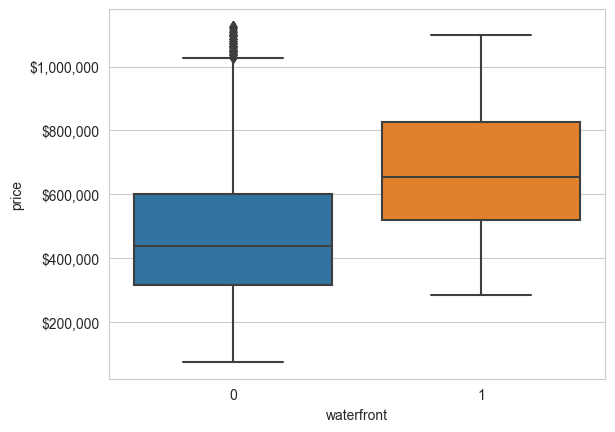

In [41]:
sns.set_style("whitegrid")
sns.boxplot(x='waterfront', y='price', data=filtered_data)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick)

# rotate Y-axis labels
plt.yticks(rotation=0)

# display plot
plt.show()

Опять же. среднестатистически начальные цены на дома с видом на море соответствуют начинаются с 25 квантиля иной категории домов, а медианные цены превышают 75 квантиль. Хотя, если убрать выбросы. на которые скорее всего влияют иные показатели, типа оценки недвижимости, метража и состояния то границы максимальных цен не сильно отличаются


2.2. Изучите распределение этажей домов






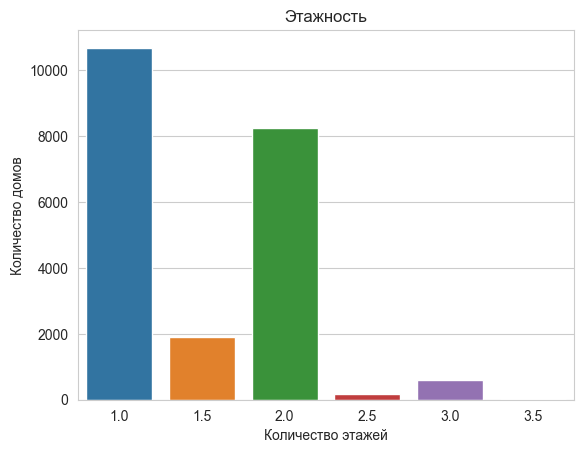

In [42]:
# Для решения этой задачи, нам необходимо группировать данные по этажам и посчитать сколько таких домов с помощью value count
count_floors = df['floors'].value_counts()
sns.barplot(x=count_floors.index, y=count_floors.values)
# добавляем подписи осей
plt.title("Этажность")
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

В основном это одноэтажные и 2 этажные дома

Стало интересно как коррелируют параметры площади и этажности (так как дилые метры - самый коррелируемый с ценой параметр)

sqft_living - Кв. метры жилые

sqft_lot - Кв. метры общие

floors - Кол-во этажей

sqft_above - Кв. метры дома, которые находятся выше земли

sqft_basement - Кв. метры дома, которые находятся ниже земли

In [43]:
corr_matrix = df[['price','floors', 'sqft_living', 'sqft_above','sqft_basement', 'sqft_lot']].corr()
corr_matrix

,price,floors,sqft_living,sqft_above,sqft_basement,sqft_lot
price,1.00,0.26,0.70,0.61,0.32,0.09
floors,0.26,1.00,0.35,0.52,-0.25,-0.01
sqft_living,0.70,0.35,1.00,0.88,0.44,0.17
sqft_above,0.61,0.52,0.88,1.00,-0.05,0.18
sqft_basement,0.32,-0.25,0.44,-0.05,1.00,0.02
sqft_lot,0.09,-0.01,0.17,0.18,0.02,1.00


Исходя из таблицы, можно сделать следующие выводы:
- Цена (price) имеет сильную положительную корреляцию с жилой площадью (sqft_living) и площадью над уровнем земли (sqft_above).
- Цена (price) имеет слабую положительную корреляцию с количеством этажей (floors) и площадью под уровнем земли (sqft_basement).
- Цена (price) имеет очень слабую положительную корреляцию с площадью участка (sqft_lot).
- Количество этажей (floors) имеет слабую положительную корреляцию с площадью над уровнем земли (sqft_above) и жилой площадью (sqft_living).
- Жилая площадь (sqft_living) имеет сильную положительную корреляцию с площадью над уровнем земли (sqft_above) и слабую положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь над уровнем земли (sqft_above) имеет слабую положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь под уровнем земли (sqft_basement) имеет очень слабую положительную корреляцию с площадью участка (sqft_lot).

In [44]:
corr_matrix = df[['sqft_living', 'sqft_above','sqft_basement']].corr()
corr_matrix

,sqft_living,sqft_above,sqft_basement
sqft_living,1.00,0.88,0.44
sqft_above,0.88,1.00,-0.05
sqft_basement,0.44,-0.05,1.00


сходя из таблицы, можно сделать следующие выводы:
- Жилая площадь (sqft_living) имеет сильную положительную корреляцию с площадью над уровнем земли (sqft_above) и сильную положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь над уровнем земли (sqft_above) имеет слабую положительную корреляцию с площадью под уровнем земли (sqft_basement).
- Площадь под уровнем земли (sqft_basement) имеет сильную положительную корреляцию с жилой площадью (sqft_living) и сильную положительную корреляцию с площадью над уровнем земли (sqft_above).

Странная история о том, что чем больше метров под землей, тем больше жилых метров, хотя корреляция в 0.72 является умеренно сильной, но чем черт не шутит)

2.3. Изучите распределение состояния домов



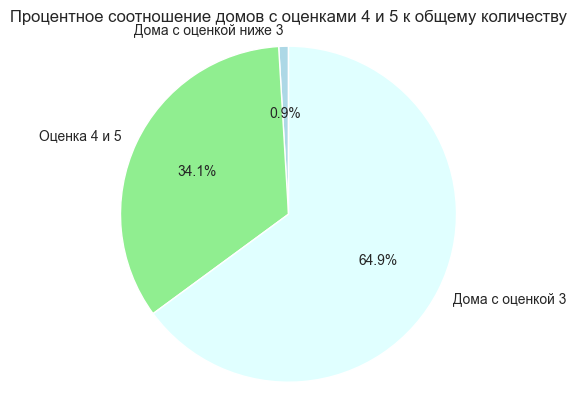

In [45]:
# Строим круговую диаграмму
labels = ['Дома с оценкой ниже 3', 'Оценка 4 и 5','Дома с оценкой 3']
sizes = [count_houses - (total_good_cond + med_condition), total_good_cond, med_condition ]
colors = ['lightblue', 'lightgreen', 'lightcyan']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Процентное соотношение домов с оценками 4 и 5 к общему количеству')
plt.show()

In [46]:
df[['price', 'condition']].corr()

,price,condition
price,1.00,0.04
condition,0.04,1.00


Цена как ни странно никак не зависит от состояния дома

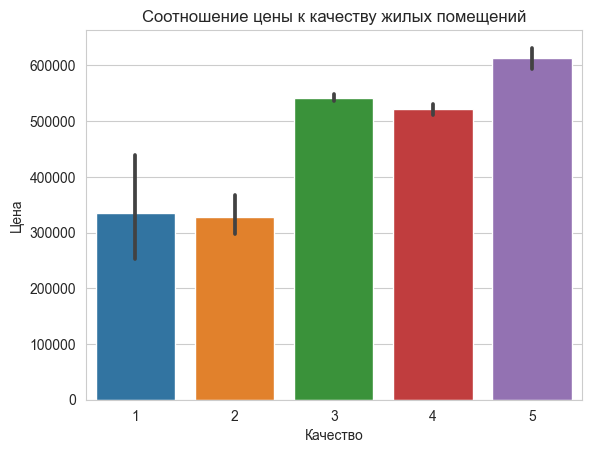

In [47]:
sns.barplot(x=df["condition"], y=df['price'])
# добавляем подписи осей
plt.title("Соотношение цены к качеству жилых помещений")
plt.xlabel('Качество')
plt.ylabel('Цена')
plt.show()

Диапазоны цен на дома с оценками 3 4 5 практически одинаковы, как и цены на дома с оценками 1 и 2 


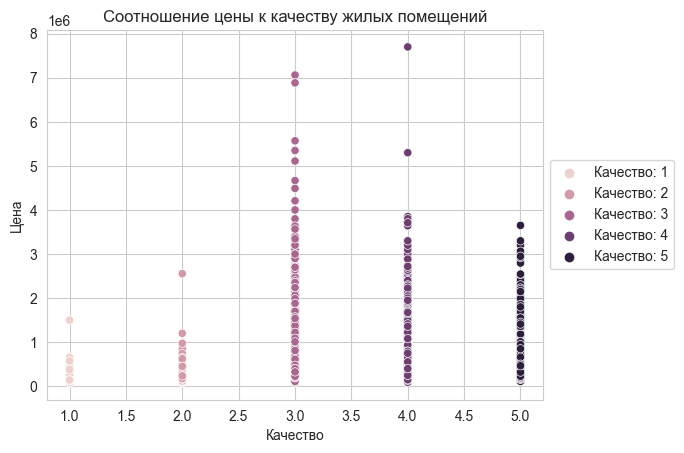

In [48]:
# построение точечной диаграммы
sns.scatterplot(x='condition', y='price', hue='condition', data=df)

# добавляем подписи осей
plt.title("Соотношение цены к качеству жилых помещений")
plt.xlabel('Качество')
plt.ylabel('Цена')

# добавляем легенду
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Качество: ' + str(label) for label in labels]
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# отображаем график
plt.show()

На этом графике видно, что цены на дома с оценкой 5 более равномерны и не имеют выбросов, а самые дорогие дома у нас как раз относятся к категориям 3 и 4
посмотрим зависимость оценки к качеству

In [49]:
df[['grade', 'condition']].corr()

,grade,condition
grade,1.00,-0.14
condition,-0.14,1.00


Эти параметры не связаны

In [50]:
# посмотрим от чего же в наибольшей степени зависит оценка
corr_matrix = df.corr()
price_corr = corr_matrix['grade'].sort_values(ascending=False).head(6)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_7956/642148266.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


grade           1.00
sqft_living     0.76
sqft_above      0.76
sqft_living15   0.71
price           0.67
z_score         0.67
Name: grade, dtype: float64

Просмотрев матрицу, мы можем заметить, что умеренно сильная корреляция этго параметра с тем или иным видом площади помещения, вероятнее всего именно от этого параметра, в большей степени, зависит оценка этого помещения

## Условие 3: 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.


In [51]:
# посмотрим от чего же в наибольшей степени зависит оценка
corr_matrix = df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=False).head(6)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_7956/347221212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price           1.00
z_score         1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
Name: price, dtype: float64

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

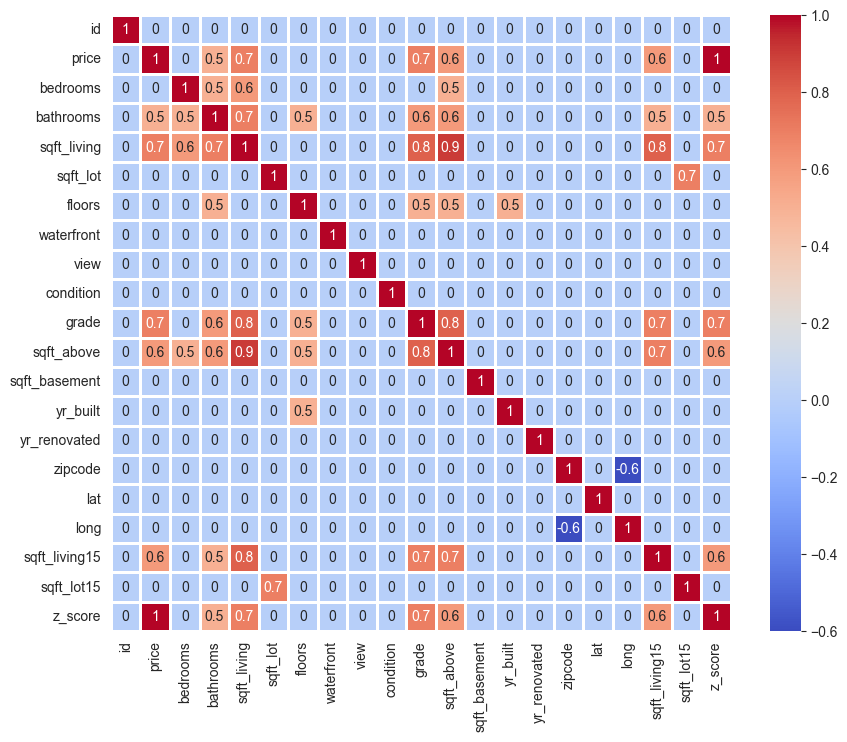

In [52]:
plt.figure(figsize=(10, 8))
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0
corr_matrix

sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm');

Параметр - жилая площадь. это самый коррелируемый с ценой параметр, так же от него зависит и оценка здания, в большей степени

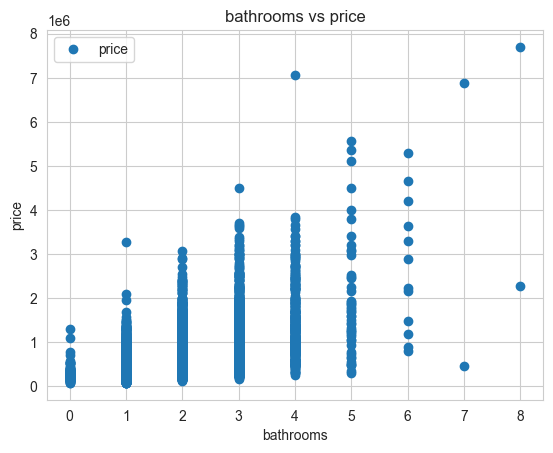

,bathrooms,price
bathrooms,1.00,0.51
price,0.51,1.00


In [53]:
df.plot(x='bathrooms', y='price', style='o')
plt.title('bathrooms vs price')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()
df[['bathrooms','price']].corr()

Самые дорогие дома с большим количеством ванных комнат, а точнее наши дома, которые сильно отличаются по цене, но это не сильно коррелирует с ценой, так как мы можем наблюдать высокую стоимость у недвижимости и со средним количеством таких комнат

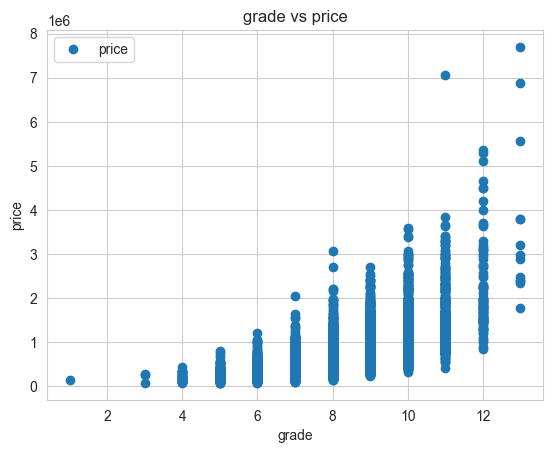

,grade,price
grade,1.00,0.67
price,0.67,1.00


In [54]:
df.plot(x='grade', y='price', style='o')

plt.title('grade vs price')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
df[['grade','price']].corr()

Попробуем посмотреть на датасет без выбросов

C:\Users\admin\AppData\Local\Temp/ipykernel_7956/3580091490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtred_corr_matrix = filtered_data.corr()


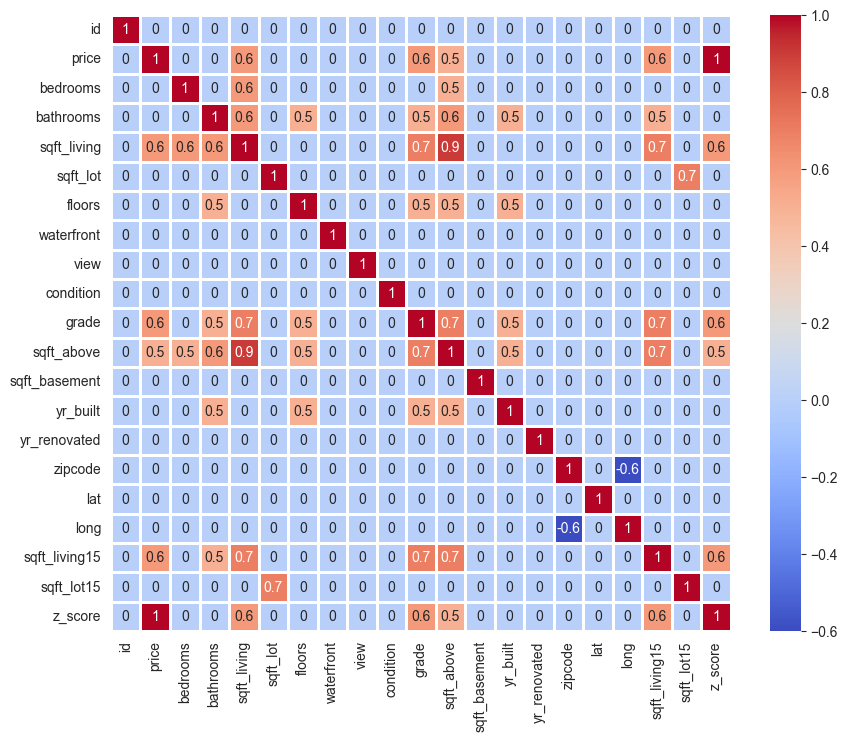

In [55]:
filtred_corr_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
filtred_corr_matrix = np.round(filtred_corr_matrix, 1)
filtred_corr_matrix[np.abs(filtred_corr_matrix) < 0.5] = 0
filtred_corr_matrix

sns.heatmap(filtred_corr_matrix, annot=True, linewidths=1, cmap='coolwarm');


In [56]:
# посмотрим от чего же в наибольшей степени зависит цена в отфильтрованном дф
price_corr_filtred = filtred_corr_matrix['price'].sort_values(ascending=False).head(5)
price_corr_filtred

z_score         1.00
price           1.00
sqft_living     0.60
sqft_living15   0.60
grade           0.60
Name: price, dtype: float64

Попробуем посмотреть на параметры Робастной регрессии

In [57]:
import statsmodels.api as sm


# Выбор столбцов для регрессии
X = filtered_data[['sqft_living', 'view', 'bathrooms','waterfront']]
y = filtered_data['price']

# Создание модели робастной регрессии
model = sm.RLM(y, X, M=sm.robust.norms.HuberT())

# Обучение модели
results = model.fit()

# Вывод результатов
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:                20467
Model:                            RLM   Df Residuals:                    20463
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 29 Jun 2023                                         
Time:                        18:56:27                                         
No. Iterations:                     3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   188.7426      1.783    105.873      


Коэффициент sqft_living равен 188, что означает, что при увеличении площади жилья на 1 квадратный фут, цена увеличится на 188 долларов.

Коэффициент view равен 43340, что означает, что если у дома есть вид, то цена увеличится на 43340 долларов.

Коэффициент bathrooms равен 45780, что означает, что при увеличении количества ванных комнат на 1, цена увеличится на 45780 долларов.
Коэффициент waterfront равен 76980, что означает, что если у дома есть вид на море, цена увеличится на 76980 долларов.
Стандартная ошибка (std err) показывает, насколько точно оценены коэффициенты регрессии. P>|z| показывает значимость каждого коэффициента, то есть вероятность того, что коэффициент равен нулю. Значения 0.000 - 0.001 означают, что все четыре коэффициента являются значимыми.

Доверительный интервал (0.025, 0.975) показывает диапазон значений, в котором с определенной вероятностью находится истинное значение коэффициента.

In [58]:
import statsmodels.api as sm

X = filtered_data[['grade','sqft_living','sqft_above','bathrooms', 'condition']]
y = filtered_data['price']

# введем константу
X = sm.add_constant(X)

# обучим модель
model = sm.OLS(y, X).fit()

# выведем
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3801.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:56:27   Log-Likelihood:            -2.7298e+05
No. Observations:               20467   AIC:                         5.460e+05
Df Residuals:                   20461   BIC:                         5.460e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.805e+05   1.12e+04    -42.894      

Это результаты линейной регрессии, проведенной с помощью метода наименьших квадратов (OLS). Регрессия использует несколько независимых переменных (price, grade, sqft_living, sqft_living15, sqft_above, bathrooms) для предсказания зависимой переменной (price). 

В результате анализа получены следующие характеристики модели:

- R-квадрат (R-squared) - это мера того, насколько хорошо модель соответствует данным. Значение 1.000 означает, что модель идеально соответствует данным.
- Скорректированный R-квадрат (Adj. R-squared) - это R-квадрат, скорректированный на количество независимых переменных в модели. Значение 1.000 означает, что модель идеально соответствует данным, учитывая количество независимых переменных.
- F-статистика (F-statistic) - это мера того, насколько значима модель в целом. 
- AIC и BIC - это меры того, насколько хорошо модель соответствует данным, учитывая количество независимых переменных. Меньшие значения AIC и BIC указывают на лучшую модель. В данном случае, AIC и BIC имеют отрицательные значения, что указывает на то, что модель хорошо соответствует данным.
- Коэффициенты (coef) - это значения, которые показывают, как каждая независимая переменная влияет на зависимую переменную. 
- P-значения (P>|t|) - это мера того, насколько значим каждый коэффициент. Значения меньше 0,05 обычно считаются значимыми. Например, коэффициент для переменной price имеет P-значение равное 0.000, что означает, что он является значимым.

Наши показатели:
Коэффициент детерминации (R-squared) равен 0.482, что означает, что модель объясняет 48% дисперсии зависимой переменной. 

Коэффициенты регрессии для каждого из предикторов (grade, sqft_living, sqft_living15, sqft_above, bathrooms) также были оценены. 

Значения стандартных ошибок (std err) показывают, насколько точно были оценены коэффициенты регрессии. 

Значения t-статистики (t) и соответствующие p-значения (P>|t|) показывают, насколько значим каждый из предикторов. 

Значения 95% доверительного интервала (0.025 и 0.975) показывают, какие значения коэффициентов могут быть ожидаемы с 95% вероятностью. 

Также в выводах указаны замечания, которые могут указывать на проблемы в модели. Например, большое значение условного числа (condition number) может указывать на наличие мультиколлинеарности или других численных проблем

В целом, линейная регрессия слабо подходит для работы с этими данными

In [59]:
filtered_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,-1.53
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,-0.01
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,-1.73
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,0.31
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,-0.14


# Посмотрим Визуально, где находятся самые дорогие дома

In [60]:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

In [61]:
geo_df.dtypes
# При создании карты ругалось на наличие столбца с таймстэмпод. он мне не нужен, я его удалю
geo_df = geo_df.drop('date', axis=1)

In [62]:
# Create a GeoDataFrame with a new column for the price category
geo_df['price_category'] =pd.cut(geo_df['price'], bins=[geo_df['price'].min(), geo_df['price'].quantile(0.5), geo_df['price'].quantile(0.9), geo_df['price'].max()], labels=['Least Expensive', 'Average Price', 'Most Expensive'])

# Create the map
map = KeplerGl(height=500)

# Add the data for each price category
map.add_data(geo_df[geo_df['price_category'] == 'Most Expensive'], name='Most Expensive')
map.add_data(geo_df[geo_df['price_category'] == 'Average Price'], name='Average Price')
map.add_data(geo_df[geo_df['price_category'] == 'Least Expensive'], name='Least Expensive')

# Set the color for each layer
map.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [
                {
                    'id': 'Most Expensive',
                    'type': 'point',
                    'config': {
                        'color': 'red'
                    }
                },
                {
                    'id': 'Average Price',
                    'type': 'point',
                    'config': {
                        'color': 'blue'
                    }
                },
                {
                    'id': 'Least Expensive',
                    'type': 'point',
                    'config': {
                        'color': 'white'
                    }
                }
            ]
        },
        'mapState': {
            'latitude': 47.6,
            'longitude': -122.3,
            'zoom': 10
        }
    }
}

# Save the map to an HTML file
map.save_to_html(file_name='C:/Users/admin/Desktop/python repo/Homeworks/califirnia_map.html')



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyter_client\session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Map saved to C:/Users/admin/Desktop/python repo/Homeworks/califirnia_map.html!


Если просмотреть Данную карту, то цена зависит от места расположения домов, самые дорогие дома находятся на побережьях, около гор и водоемов. посмотрим на показатель вида. это категориальный показатель
для этого разобьем его на бины

In [63]:
# Create a new column for the view category
geo_df['view_category'] = pd.cut(geo_df['view'], bins=[0, 2, 3, 5], labels=['Bad', 'Average', 'Good'])

# Create the map
map = KeplerGl(height=500)

# Add the data for each view category
map.add_data(geo_df[geo_df['view_category'] == 'Good'], name='Good View')
map.add_data(geo_df[geo_df['view_category'] == 'Average'], name='Average View')
map.add_data(geo_df[geo_df['view_category'] == 'Bad'], name='Bad View')

# Set the color for each layer
map.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [
                {
                    'id': 'Good View',
                    'type': 'point',
                    'config': {
                        'color': 'green'
                    }
                },
                {
                    'id': 'Average View',
                    'type': 'point',
                    'config': {
                        'color': 'yellow'
                    }
                },
                {
                    'id': 'Bad View',
                    'type': 'point',
                    'config': {
                        'color': 'red'
                    }
                }
            ]
        },
        'mapState': {
            'latitude': 47.6,
            'longitude': -122.3,
            'zoom': 10
        }
    }
}

# Save the map to an HTML file
map.save_to_html(file_name='./california_view.html')


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./california_view.html!


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyter_client\session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


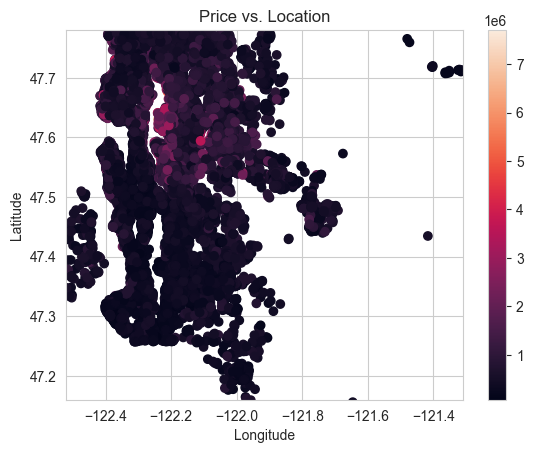

In [64]:

fig, ax = plt.subplots()
scatter = ax.scatter(geo_df['long'], geo_df['lat'], c=geo_df['price'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Price vs. Location')
plt.colorbar(scatter, ax=ax)
ax.set_xlim(-122.52, -121.31)
ax.set_ylim(47.16, 47.78)
plt.show()


посмотрим на среднюю цену каждый группы метража

In [65]:
grouped_sqft_living=filtered_data[['sqft_living', 'price']].groupby(['sqft_living'],as_index= False).mean()

grouped_sqft_living

,sqft_living,price
0,290,142000.00
1,370,276000.00
2,380,245000.00
3,384,265000.00
4,390,236500.00
...,...,...
894,5820,784500.00
895,6050,930000.00
896,7120,900000.00
897,7350,1110000.00


слишком много групп для анализа. попробуем разбить это на категории от минимума до 25% это небольшая площадь, от 25 до 50 - средняя и так далее, если мы обратимся снова к графикам, то увидим, что выбросы сильно влияют на результат описания, поэтому выбросам мы присвоим категорию extra

In [66]:
filtered_data['sqft_living'].describe()

count   20467.00
mean     1975.56
std       774.83
min       290.00
25%      1400.00
50%      1860.00
75%      2431.00
max      7480.00
Name: sqft_living, dtype: float64

In [67]:
# Задаем границы интервалов для каждой категории
bins = [0, 2000, 4000, 6000, 14000]

# Создаем список меток для каждой категории
labels = ['low_sqft', 'medium_sqft', 'large_sqft','extra_sqft']

# Используем функцию pd.cut() для разделения данных на категории
filtered_data['sqft_category'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)

# Выводим первые 5 строк датафрейма для проверки
df.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_7956/3691916091.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sqft_category'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,year_period,waterfront-binned
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,...,1955,0,98178,47.51,-122.26,1340,5650,-0.87,1940-1980,No
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,...,1951,1991,98125,47.72,-122.32,1690,7639,-0.01,1940-1980,No
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,...,1933,0,98028,47.74,-122.23,2720,8062,-0.98,1900-1940,No
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,...,1965,0,98136,47.52,-122.39,1360,5000,0.17,1940-1980,No
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,...,1987,0,98074,47.62,-122.05,1800,7503,-0.08,1980-2020,No


In [68]:
filtered_data['sqft_category'].value_counts()

low_sqft       11694
medium_sqft     8477
large_sqft       292
extra_sqft         4
Name: sqft_category, dtype: int64

<Axes: xlabel='sqft_category', ylabel='price'>

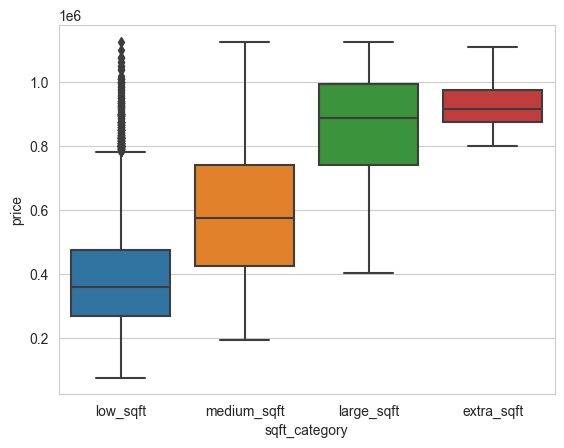

In [69]:
sns.boxplot(x="sqft_category", y="price", data=filtered_data)

In [70]:
grouped_category=filtered_data[['sqft_category', 'price']].groupby(['sqft_category'])
grouped_category.head(2)

,sqft_category,price
0,low_sqft,221900.00
1,medium_sqft,538000.00
2,low_sqft,180000.00
10,medium_sqft,662500.00
41,large_sqft,775000.00
70,large_sqft,1040000.00
577,extra_sqft,930000.00
2713,extra_sqft,1110000.00


Если посмотреть на график зависимости цены от площади, то  мы заметим, что график рассеяния имеет форму конуса, возможно, мы можем  сгруппировать данные, а точнее разбить на интервалы метраж и посмотреть что влияет на цену в каждой категории

In [71]:
from scipy.stats import f_oneway

In [72]:
# ANOVA
# f_val, p_val = stats.f_oneway(grouped_category.get_group('low_sqft')['price'], grouped_category.get_group('medium_sqft')['price'], grouped_category.get_group('large_sqft')['price'], grouped_category.get_group('extra_sqft')['price'])   
# print( "ANOVA results: F=", f_val, ", P =", p_val)   

F-значение 5455,867802367909 указывает на отношение дисперсии между группами к дисперсии внутри групп. Высокое значение F-значения говорит о том, что средние значения групп значительно отличаются друг от друга. P-значение 0,0 указывает на вероятность случайного получения такого большого F-значения. Низкое P-значение говорит о том, что различия между группами статистически значимы, и мы можем отвергнуть нулевую гипотезу о том, что средства групп равны. В данном случае P-значение очень мало (менее 0,05), что означает, что различия между группами высоко значимы.

# ЛИНЕЙНАЯ РЕГРЕССИЯ

Создадим выборки относительно группы и проанализируем их, попробуем создать модели

In [73]:
X_filtred = filtered_data[['sqft_living']]
y_filtred = filtered_data['price']

model_filtred = LinearRegression()
model_filtred.fit(X_filtred, y_filtred)
# наклон
model_filtred.coef_


array([167.36021925])

In [74]:
# Значение цены, когда x = 0
model_filtred.intercept_

146354.71150073851

In [75]:
Predicted_price_filtred = model_filtred.predict(X_filtred)
Predicted_price_filtred[0:5]   

array([343839.77021501, 576470.47497164, 275222.08032276, 474380.74122952,
       427519.8798397 ])

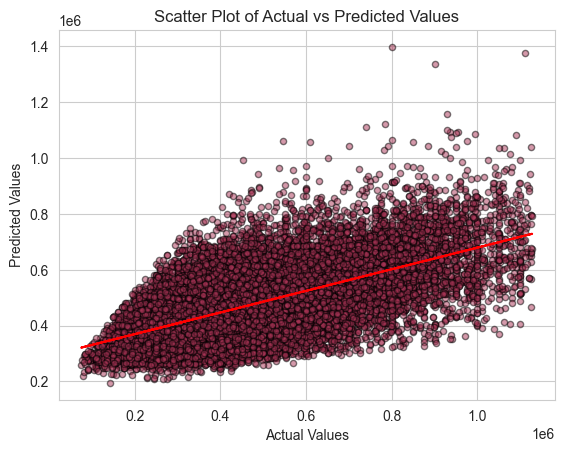

In [76]:

y_actual = filtered_data['price']

# predicted values
y_predicted = Predicted_price_filtred

# plot scatter plot
plt.scatter(y_actual, y_predicted, s=20, alpha=0.5, color='#AA3456', edgecolor='black')

# add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')

# add regression line
slope, intercept = np.polyfit(y_actual, y_predicted, 1)
plt.plot(y_actual, slope*y_actual + intercept, color='red')

# show plot
plt.show()

Выглядит отвратительно... значения слишклм разбросаны...

In [77]:
r2 = r2_score(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
mae = mean_absolute_error(y_actual, y_predicted)
print('R-squared for sqft_living VS price:', r2)
print('MSE:', mse)
print('MAE:', mae)

R-squared for sqft_living VS price: 0.3872982757987036
MSE: 26601340694.466133
MAE: 131269.4442306919




Значение R-квадрат 0,10422846765009686 показывает, что только 10,4% дисперсии в `цене` может быть объяснено характеристикой `sqft_living`. Это означает, что модель не очень хорошо подходит для данных, и, скорее всего, существуют другие факторы, влияющие на `цену` дома, а точнее...все.

Значение MSE (средняя квадратичная ошибка) 21770942794.968296 указывает, d данном случае MSE довольно высок, что означает, что модель не очень точно предсказывает значения `цен`.

Значение MAE (средняя абсолютная ошибка) 116228.56541823447 указывает на среднюю абсолютную разницу между предсказанными значениями `цен` и фактическими значениями `цен` в наборе данных. Более низкое значение MAE указывает на лучшую производительность модели. В данном случае MAE довольно высок, что означает, что модель не очень точно предсказывает значения `цен`.

Попробуем выбрать очень маленький процент дф и посмотреть , но на графике каша из за большого количества наблюдений, хотя заметно, что модель близка к среднему показателю и среднеквадратичная ошибка значительна

In [78]:
df_sample = df.sample(frac=0.01, random_state=23000)

(0.0, 2358000.0)

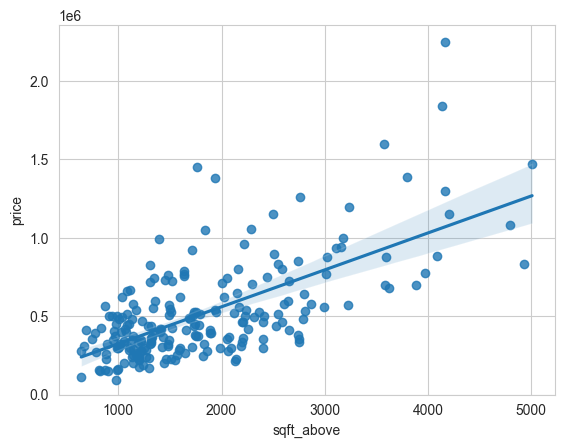

In [79]:
sns.regplot(x='sqft_above', y= 'price',data=df_sample)
plt.ylim(0,)

# Мультилинейная регрессия

In [80]:
# сформируем фрейм из параметров, необходимых для добавления в модель
corr_df= filtered_data[['sqft_above','bathrooms', 'condition', 'waterfront', 'view']]
# скорректируем модель по этим параметрам
model_filtred.fit(corr_df, filtered_data['price'])


LinearRegression()

In [81]:
model_filtred.intercept_ 

18443.86794983095

In [82]:
model_filtred.coef_

array([   129.98910798,  47126.40131515,  42918.39665935, -10370.27841214,
        62279.64237104])

In [83]:
Price_multy = model_filtred.intercept_ +  model_filtred.coef_[0] * filtered_data['sqft_above'] + model_filtred.coef_[1] * filtered_data['bathrooms'] 
+ model_filtred.coef_[2] * filtered_data['condition']+ model_filtred.coef_[3] * filtered_data['waterfront'] + model_filtred.coef_[4] * filtered_data['view']
Price_multy 

0       218957.42
1       394773.03
2       165661.88
3       296311.64
4       331078.37
           ...   
21608   311580.01
21609   412971.51
21610   151032.76
21611   320679.24
21612   151032.76
Length: 20467, dtype: float64

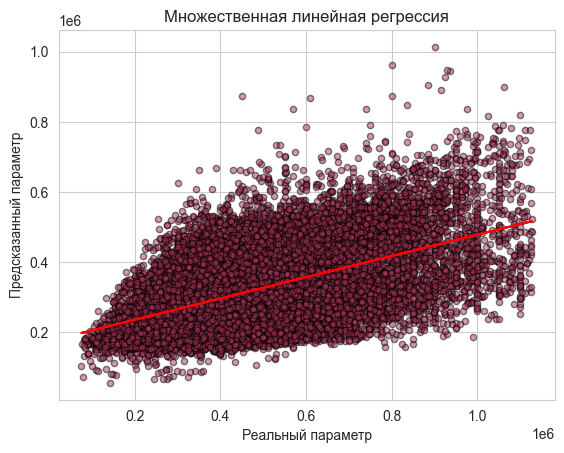

In [84]:
# предсказанный параметр

predicted = Price_multy
# реальный параметр
real = filtered_data['price']

# создаем график
plt.scatter(real, predicted, s=20, alpha=0.5, color='#AA3456', edgecolor='black')

# добавляем заголовок и подписи осей
plt.title('Множественная линейная регрессия')
plt.xlabel('Реальный параметр')
plt.ylabel('Предсказанный параметр')
# add regression line
slope, intercept = np.polyfit(real, predicted, 1)
plt.plot(real, slope*real + intercept, color='red')

# выводим график на экран
plt.show()

Дело плохо. предсказать цену на недвижимость почти невозможно с помощью этих параметров, хотя они имеют высокую корреляцию с ценой.

In [85]:
r2 = r2_score(real, predicted)
mse = mean_squared_error(real, predicted)
mae = mean_absolute_error(real, predicted)
print('R-squared :', r2)
print('MSE:', mse)
print('MAE:', mae)

R-squared : -0.2695377247162245
MSE: 55118835488.307556
MAE: 180163.58028740544


Отрицательное значение R-квадрат указывает на то, что модель плохо подходит для данных. R-квадрат - это статистическая мера, которая представляет собой долю дисперсии зависимой переменной, которая объясняется независимыми переменными в модели. Отрицательное значение R-квадрат означает, что модель не объясняет дисперсию зависимой переменной и даже может работать хуже, чем модель, которая просто предсказывает среднее значение зависимой переменной.

MSE (средняя квадратичная ошибка) - это мера средней квадратичной разницы между прогнозируемыми и фактическими значениями зависимой переменной. Более высокое значение MSE указывает на то, что модель менее точна в прогнозировании зависимой переменной.

MAE (средняя абсолютная ошибка) - это показатель средней абсолютной разницы между предсказанными и фактическими значениями зависимой переменной. Более высокое значение MAE указывает на то, что модель менее точна в прогнозировании зависимой переменной.

In [86]:
filtered_data.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,sqft_category
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,...,0,1955,0,98178,47.51,-122.26,1340,5650,-1.53,low_sqft


Посмотрим на распределение

C:\Users\admin\AppData\Local\Temp/ipykernel_7956/1689002501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(filtered_data['price'], hist=False, color="r", label="Actual Value")
C:\Users\admin\AppData\Local\Temp/ipykernel_7956/1689002501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

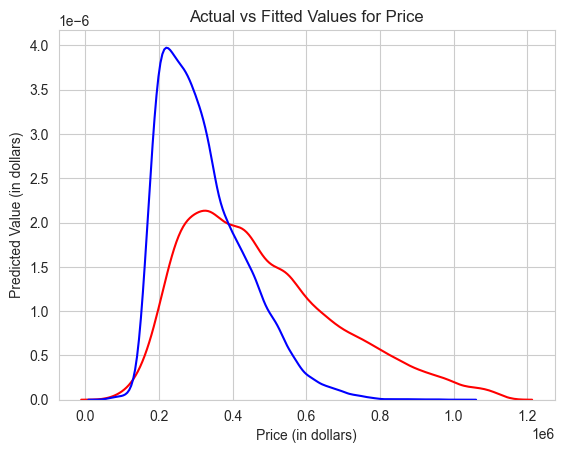

In [87]:
ax1 = sns.distplot(filtered_data['price'], hist=False, color="r", label="Actual Value")
ax = sns.distplot(Price_multy, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Predicted Value (in dollars)')

plt.show()
plt.close()

Попробуем использовать полиномиальную регрессию на всех данных и на их части

In [88]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(min(filtered_data["sqft_living"]), max(filtered_data["sqft_living"]), len(filtered_data['sqft_living']))
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ sqft')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')

    plt.show()
    plt.close()

In [89]:
# создадим объект полинома 22 степени
x_sqft = filtered_data['sqft_living']
y = filtered_data['price']
polinom_coef = np.polyfit(x_sqft, y, 22) # f
polinom_obj = np.poly1d(polinom_coef) # p
print(polinom_obj)

            22             21             20             19
-1.001e-72 x  + 3.668e-68 x  - 4.515e-64 x  + 9.659e-61 x 
             18             17            16            15
 + 2.03e-56 x  - 6.181e-53 x  - 1.16e-48 x  + 2.83e-45 x 
              14             13             12             11
 + 7.036e-41 x  - 1.781e-37 x  - 4.165e-33 x  + 2.137e-29 x 
              10             9            8            7             6
 + 1.703e-25 x  - 2.523e-21 x + 1.47e-17 x - 5.21e-14 x + 1.235e-10 x
              5             4         3         2
 - 2.011e-07 x + 0.0002244 x - 0.167 x + 78.38 x - 2.051e+04 x + 2.447e+06


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


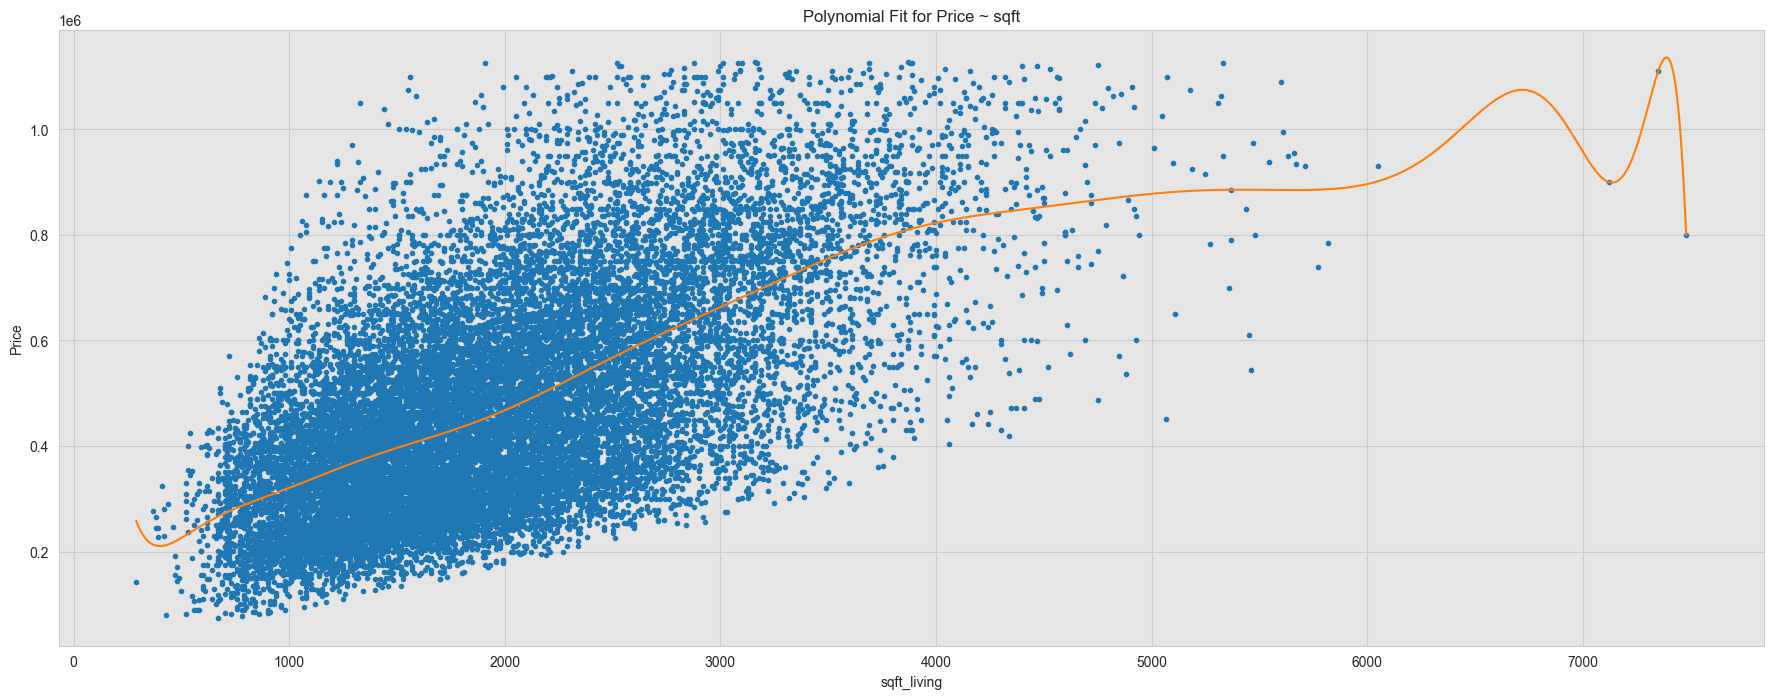

In [90]:
plt.figure(figsize=(22, 8))
PlotPolly(polinom_obj, x_sqft, y,'sqft_living')

In [91]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(min(df_sample["sqft_living"]), max(df_sample["sqft_living"]), len(df_sample['sqft_living']))
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ sqft')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')

    plt.show()
    plt.close()

In [112]:
# создадим объект полинома 8 степени
x_sqft = df_sample['sqft_living']
y = df_sample['price']
polinom_coef = np.polyfit(x_sqft, y, 8) # f
polinom_obj = np.poly1d(polinom_coef) # p
print(polinom_obj)

           8           7             6             5             4
4.443e-21 x - 8.8e-17 x + 7.297e-13 x - 3.316e-09 x + 9.068e-06 x
            3         2
 - 0.01529 x + 15.43 x - 8207 x + 1.943e+06


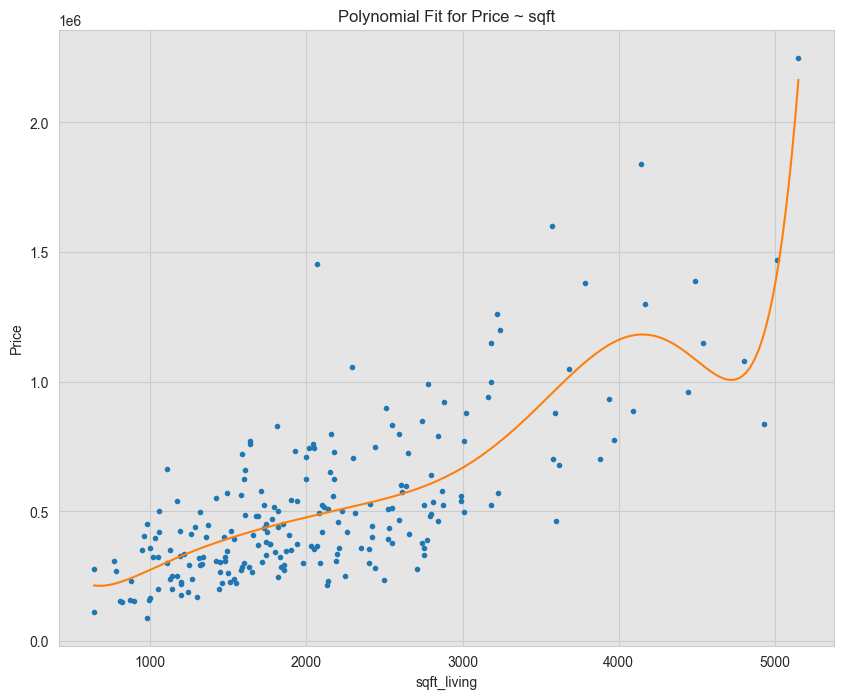

In [113]:
plt.figure(figsize=(10, 8))
PlotPolly(polinom_obj, x_sqft, y,'sqft_living')

In [94]:
filtered_data.to_csv('filtred_data_houses.csv')

разбить по группам метража, искать что влияет на цену в каждой группе. сделать биннинг более мелких диапазонов

In [95]:
# Задаем границы интервалов для каждой категории
bins = [0, 2000, 4000, 6000, 14000]

# Создаем список меток для каждой категории
labels = ['low_sqft', 'medium_sqft', 'large_sqft','extra_sqft']

# Используем функцию pd.cut() для разделения данных на категории
df['sqft_category'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)

# Выводим первые 5 строк датафрейма для проверки
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,year_period,waterfront-binned,sqft_category
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,...,0,98178,47.51,-122.26,1340,5650,-0.87,1940-1980,No,low_sqft
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,...,1991,98125,47.72,-122.32,1690,7639,-0.01,1940-1980,No,medium_sqft
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,...,0,98028,47.74,-122.23,2720,8062,-0.98,1900-1940,No,low_sqft
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,...,0,98136,47.52,-122.39,1360,5000,0.17,1940-1980,No,low_sqft
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,...,0,98074,47.62,-122.05,1800,7503,-0.08,1980-2020,No,low_sqft


In [96]:
df_sqft_low = df.loc[df['sqft_category']=='low_sqft']
df_sqft_medium = df.loc[df['sqft_category']=='medium_sqft']
df_sqft_large = df.loc[df['sqft_category']=='large_sqft']
df_sqft_extra = df.loc[df['sqft_category']=='extra_sqft']


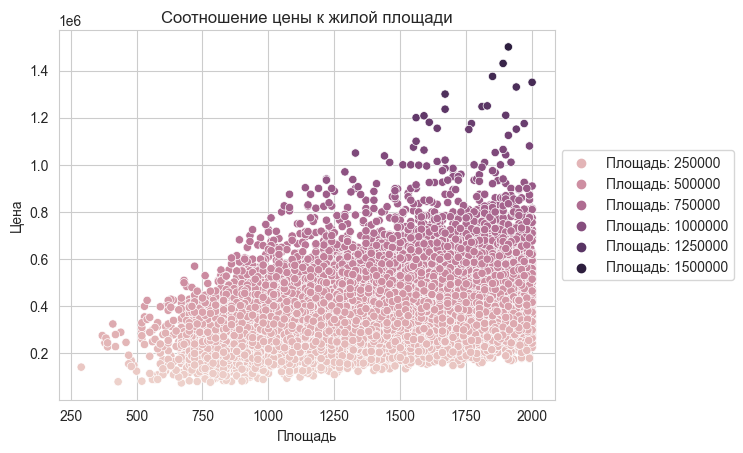

In [97]:
# построение точечной диаграммы
sns.scatterplot(x='sqft_living', y='price', hue='price', data=df_sqft_low)

# добавляем подписи осей
plt.title("Соотношение цены к жилой площади")
plt.xlabel('Площадь')
plt.ylabel('Цена')

# добавляем легенду
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Площадь: ' + str(label) for label in labels]
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# отображаем график
plt.show()

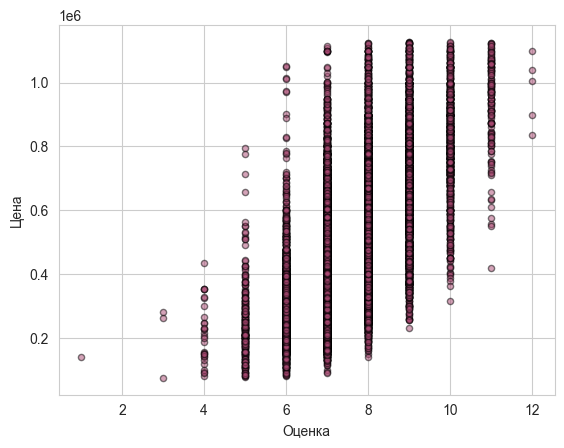

In [98]:

# Строим график зависимости цены от оценки

plt.scatter(filtered_data[['grade']], filtered_data['price'], alpha=0.5, s=20, color='#AA4872', edgecolor='black' )

plt.xlabel('Оценка')
plt.ylabel('Цена')
plt.show()

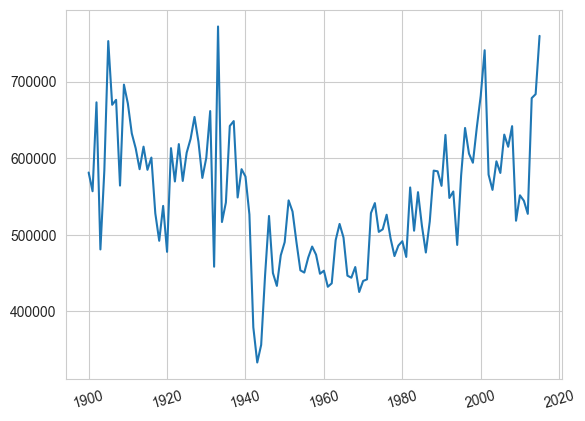

In [99]:
tmp_df = df[['yr_built', 'price']].sort_values(by=['yr_built'])

group = tmp_df.groupby(['yr_built'])['price'].mean()
avg_price_of_the_year = [avg_price for avg_price in group]

plt.plot(tmp_df.yr_built.unique(), avg_price_of_the_year, linestyle='solid')
plt.xticks(rotation=16);

Стоимость зависит так же от года постройки, хоть и корреляция слабая, можно сдлелать вывод о том, в какие года были построены самые дорогие жилые объекты

In [100]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,year_period,waterfront-binned,sqft_category
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,...,0,98178,47.51,-122.26,1340,5650,-0.87,1940-1980,No,low_sqft


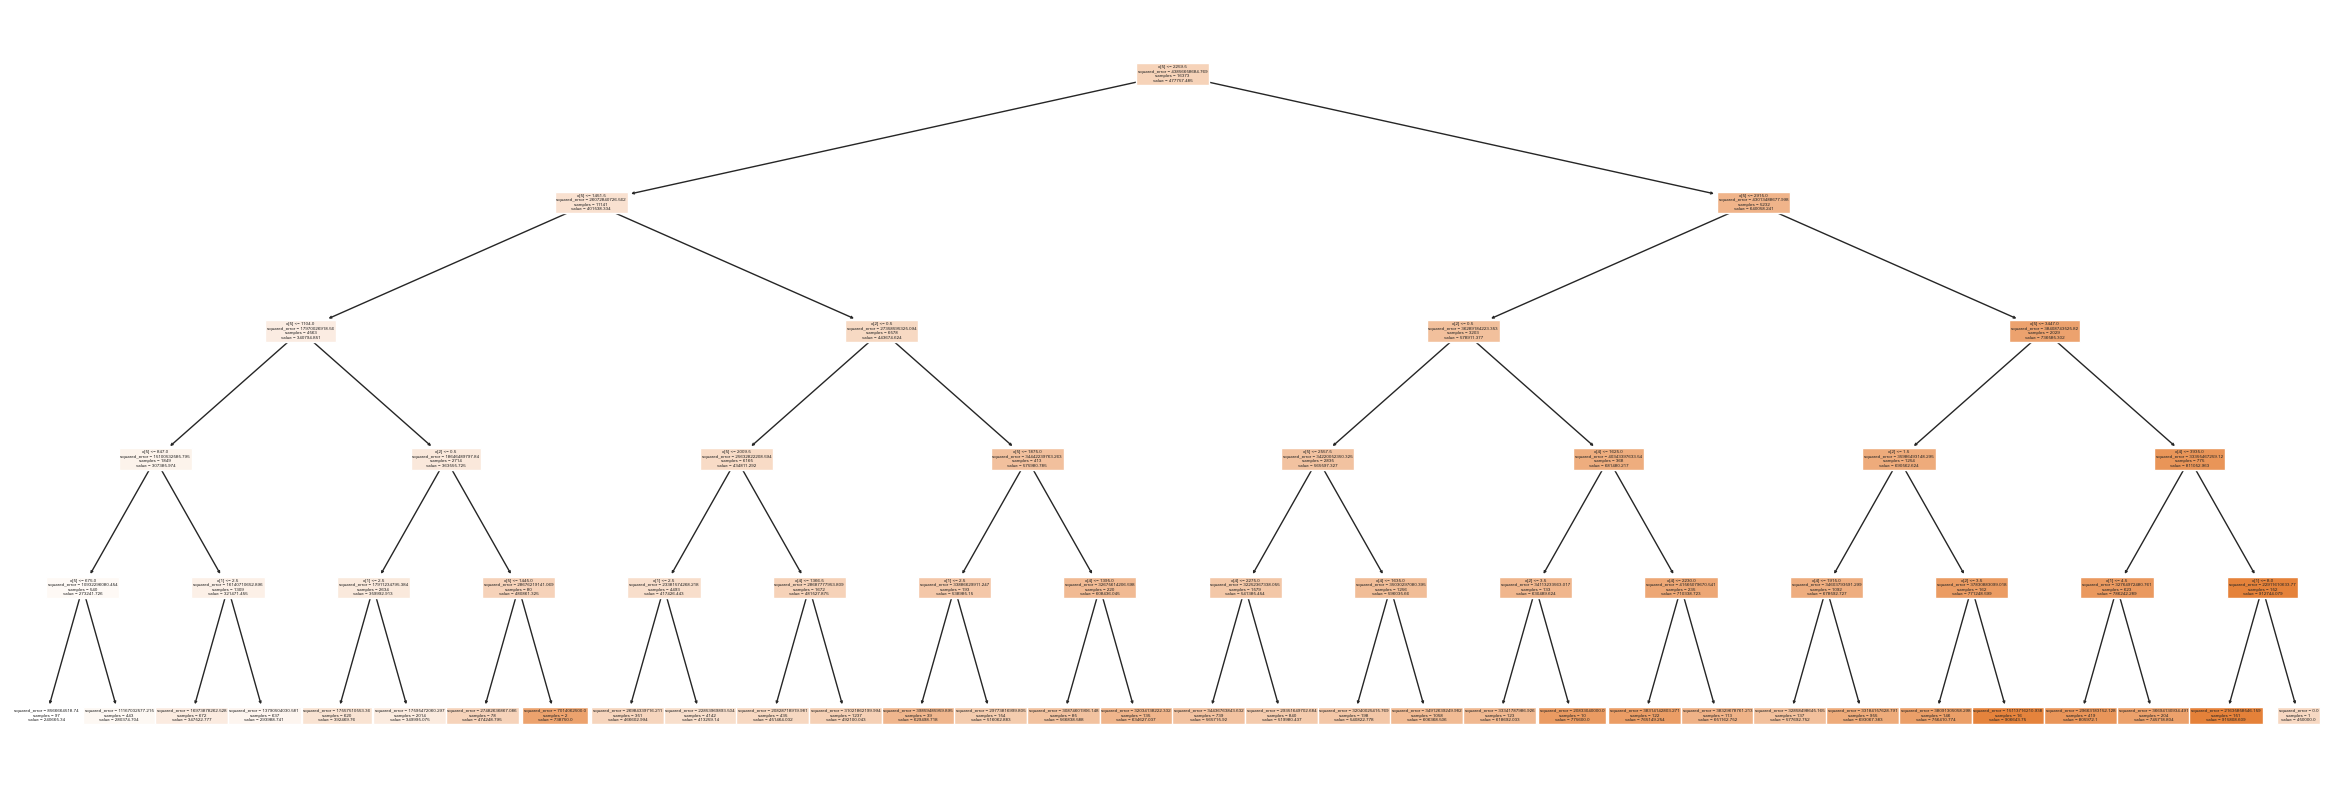

In [101]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Выбираем столбцы для регрессии
X = filtered_data[["waterfront","bedrooms","view" ,"bathrooms","sqft_above","sqft_living"]]
y = filtered_data['price']

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект дерева решений
model = DecisionTreeRegressor(max_depth=5)

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

# Выполняем предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Визуализируем дерево решений
plt.figure(figsize=(30,10))
plot_tree(model, filled=True)
plt.savefig('decision_tree.png', dpi=300)  # Сохранение дерева решений в высоком разрешении
plt.show()

Во главе дерева решений лежит признак x[5] - он наиболее влияющий на цену, это наша жилая площадь. Во всех случаях, кроме одного, где в выборку попадает один образец, очень высокая среднеквадратичная ошибка, за счет большого количества образцов и разброса цен..  

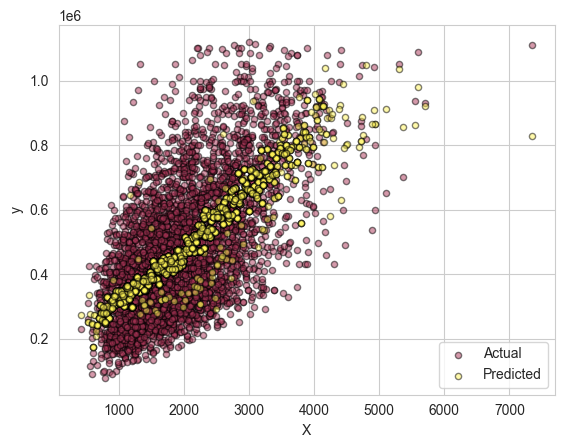

In [102]:
from sklearn.ensemble import RandomForestRegressor

X = filtered_data[["sqft_living"]]
y = filtered_data['price']
# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели RandomForestRegressor
model = RandomForestRegressor()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Получение предсказанных значений на тестовых данных
y_pred = model.predict(X_test)

# Визуализация результатов
plt.scatter(X_test, y_test, label='Actual',s=20, alpha=0.5, color='#AA3456', edgecolor='black')
plt.scatter(X_test, y_pred, label='Predicted',s=20, alpha=0.5, color='#FFF456', edgecolor='black')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Так или иначе, предсказать цену каждого обьекта в выборке не получается, но описать направление и средние, возможно оптимальные значения типа 'цена - качество' значения по каждой категории размеров жилой площади возможно, если в выборке небольшое количество значений, то подбор оптимальной цены будет не самой сложной задачей

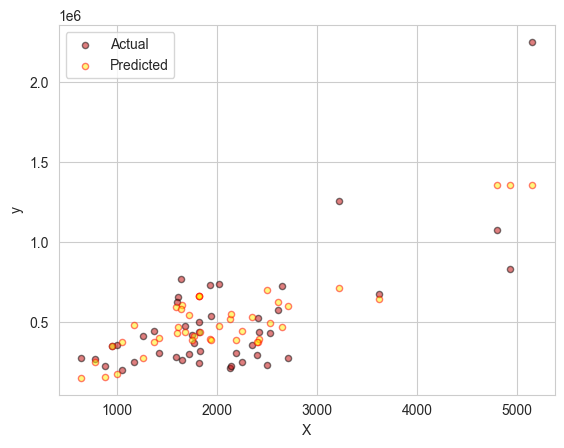

In [103]:
X = df_sample[["sqft_living"]]
y = df_sample['price']
# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели RandomForestRegressor
model = RandomForestRegressor()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Получение предсказанных значений на тестовых данных
y_pred = model.predict(X_test)

# Визуализация результатов
plt.scatter(X_test, y_test, label='Actual',s=20, alpha=0.5, color='#C00000', edgecolor='black')
plt.scatter(X_test, y_pred, label='Predicted',s=20, alpha=0.5, color='#FFF200', edgecolor='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

При использования рандомной тестовой выборки мы видим, что цена на дома до 3000 метров предсказывается достаточно точно

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


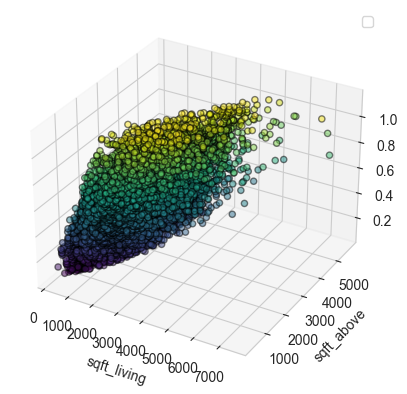

In [104]:
from mpl_toolkits import mplot3d

# Создание трехмерного графика
fig = plt.figure()
ax = plt.axes(projection='3d')

# Построение трехмерного графика
ax.scatter3D(filtered_data['sqft_living'], filtered_data['sqft_above'], filtered_data['price'], c=filtered_data['price'], cmap='viridis',s=20, alpha=0.5, edgecolor='black')
ax.set_xlabel('sqft_living')
ax.set_ylabel('sqft_above')
ax.set_zlabel('price')
plt.legend()

plt.show()

при увеличении площади жилый помещений увеличивается диапазон цен на нее, соответсвенно и предсказать ее будет сложнее и нужен каждый конкретный случай рассматривать отдельно

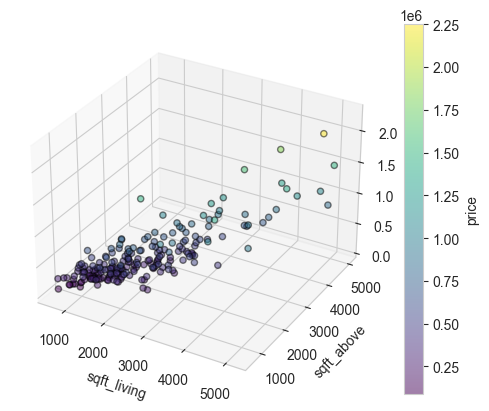

In [105]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Построение трехмерного графика
scatter = ax.scatter3D(df_sample['sqft_living'], df_sample['sqft_above'], df_sample['price'], c=df_sample['price'], cmap='viridis', s=20, alpha=0.5, edgecolor='black')
ax.set_xlabel('sqft_living')
ax.set_ylabel('sqft_above')
ax.set_zlabel('price')

# Добавление легенды
plt.colorbar(scatter, label='price')

plt.show()

In [106]:
X = filtered_data[['sqft_living']]
Y = filtered_data['price']
lm_sqft_living = LinearRegression()
lm_sqft_living.fit(X,Y)
lm_sqft_living.score(X, Y)

0.3872982757987036

Наилучший показатель  будет при оценке большого количества факторов:

In [107]:
features = filtered_data[["floors", "waterfront", 'lat', 'long' ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade"]]
X = features
Y = filtered_data['price']
lm_sqft_living.fit(X, Y)
lm_sqft_living.score(X, Y) # R-squared

0.647859907846361

Показатель r^2 ближе к единице при учете многих параметров при предсказании цены, что не странно, так как мы выяснили что при увеличении каждого из показателей у величивается и средняя стоимость того или иного объекта недвижимости

Так или иначе, цена недвижимости зависит от многих факторов, таких как его расположение, метраж жилой и иной площади, так же многих ругих характеристик. 
разброс цен в каждой категории достаточно велик и это может быть объяснено обычными рыночными условиями, так как речь идет не о себестоимости, 
все аналитические модели имеют достаточно высокую среднеквадратичную ошибку и в большей мере описывают среднюю цену каждой категории